## Lib import

In [13]:
import pandas as pd
from sklearn import decomposition
import numpy as np

## Exploring features

In [14]:
features_df = pd.read_csv("HAPT Data Set/features.txt")
features_df.head()
#features_df.describe()

,tBodyAcc-Mean-1
0,tBodyAcc-Mean-2
1,tBodyAcc-Mean-3
2,tBodyAcc-STD-1
3,tBodyAcc-STD-2
4,tBodyAcc-STD-3


## Loading data

In [15]:
print ('Loading data...')
X_tr = np.loadtxt('HAPT Data Set/Train/X_train.txt', delimiter=' ')
Y_tr = np.loadtxt('HAPT Data Set/Train/y_train.txt')
train_size = int(X_tr.shape[0]*0.8)
X_train = X_tr[0:train_size]
Y_train = Y_tr[0:train_size]
X_val = X_tr[train_size:]
Y_val = Y_tr[train_size:]

X_test = np.loadtxt('HAPT Data Set/Test/X_test.txt', delimiter=' ')
y_test = np.loadtxt('HAPT Data Set/Test/y_test.txt')
print ('Done!')

Loading data...
Done!


In [16]:
X_tr.shape

(7767, 561)

In [17]:
X_train.shape

(6213, 561)

In [18]:
X_val.shape

(1554, 561)

In [19]:
X_test.shape

(3162, 561)

# Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Fitting classifier to the Training set

In [21]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

## Predicting the Test set results

In [22]:
y_pred = classifier.predict(X_test)

## Accuracy

In [23]:
print(np.sum(y_pred==y_test)/float(X_test.shape[0]))

0.8839342188488298


## Visualizing results

In [26]:
from mlxtend.evaluate import confusion_matrix
cm = confusion_matrix(y_target=y_test, 
                      y_predicted=y_pred, 
                      binary=True, 
                      positive_label=1)
cm

array([[2562,  104],
       [  34,  462]])

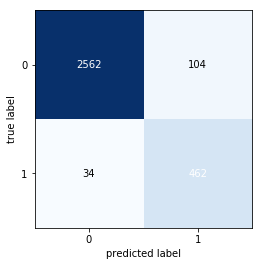

In [27]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()